<a href="https://colab.research.google.com/github/dansarmiento/machine_learning_notebooks/blob/main/Back_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Train a Neural Network to Solve the XOR Problem
- Implement Backpropagation for Neural Network Training
- Demonstrate the Use of Activation Functions
- Understand the Learning Process Over Multiple Epochs
- Demonstrate Weight and Bias Adjustments via Gradient Descent
- Evaluate the Model's Performance After Training
- Monitor and Analyze the Training Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

Define the network parameters such as

- number of input neurons
- hidden layer neurons
- output neurons
- learning rate
- number of epochs

In [3]:
# Network parameters
inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.1          # Learning rate
epochs = 180000   # Number of training epochs

In [4]:
# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1         # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1         # Bias for output layer

Training the Neural Network
The neural network works in 5 stages:

Forward pass

The input X is multiplied by the weights w1 and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
The output of the hidden layer is then passed through the second set of weights w2 to compute the final output. Again, a sigmoid activation function is used to generate the final output a2.
Error calculation

The error is computed as the difference between the expected output (d) and the actual output (a2).
Backward pass

Output Layer: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer (da2). This is used to calculate how much the weights in the output layer need to be adjusted.
Hidden Layer: The error is then propagated backward to the hidden layer. The gradient at the hidden layer (da1) is computed by taking the dot product of the transpose of the weights (w2.T) and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
Weights and bias updates

After computing the gradients (dz1, dz2), the weights (w1, w2) and biases (b1, b2) are updated using the learning rate (lr) and the gradients. The updates are done to minimize the error and improve the model’s predictions.
Training:

This entire process is repeated over many iterations (epochs). During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function. Forward Pass:

In [5]:
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.05502
Epoch: 19999, Average error: 0.03104
Epoch: 29999, Average error: 0.02366
Epoch: 39999, Average error: 0.01978
Epoch: 49999, Average error: 0.01732
Epoch: 59999, Average error: 0.01557
Epoch: 69999, Average error: 0.01426
Epoch: 79999, Average error: 0.01323
Epoch: 89999, Average error: 0.01238
Epoch: 99999, Average error: 0.01168
Epoch: 109999, Average error: 0.01109
Epoch: 119999, Average error: 0.01057
Epoch: 129999, Average error: 0.01012
Epoch: 139999, Average error: 0.00972
Epoch: 149999, Average error: 0.00937
Epoch: 159999, Average error: 0.00905
Epoch: 169999, Average error: 0.00876
Epoch: 179999, Average error: 0.00850


In [6]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

Final output after training: [[0.0095138  0.9919077  0.99190731 0.00828333]]
Ground truth [0 1 1 0]
Error after training: [[-0.00951382  0.00809233  0.00809272 -0.00828336]]
Average error: 0.00850


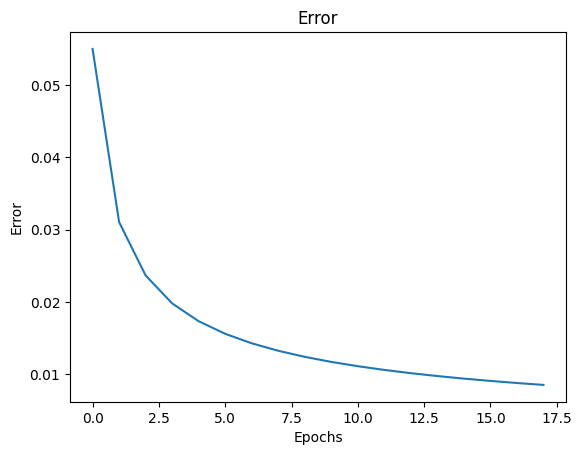

In [7]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Epoch: 9999, Average error: 0.25342
Epoch: 19999, Average error: 0.25473
Epoch: 29999, Average error: 0.01927
Epoch: 39999, Average error: 0.01270
Epoch: 49999, Average error: 0.01019
Epoch: 59999, Average error: 0.00876
Epoch: 69999, Average error: 0.00781
Epoch: 79999, Average error: 0.00712
Epoch: 89999, Average error: 0.00659
Epoch: 99999, Average error: 0.00616
Epoch: 109999, Average error: 0.00581
Epoch: 119999, Average error: 0.00552
Epoch: 129999, Average error: 0.00526
Epoch: 139999, Average error: 0.00504
Epoch: 149999, Average error: 0.00485
Epoch: 159999, Average error: 0.00467
Epoch: 169999, Average error: 0.00452
Epoch: 179999, Average error: 0.00438

Final output after training: [[0.00795678 0.00170394 0.00170389 0.99385618]]
Ground truth [0 0 0 1]
Error after training: [[-0.0079568  -0.00170394 -0.00170389  0.00614384]]
Average error: 0.00438


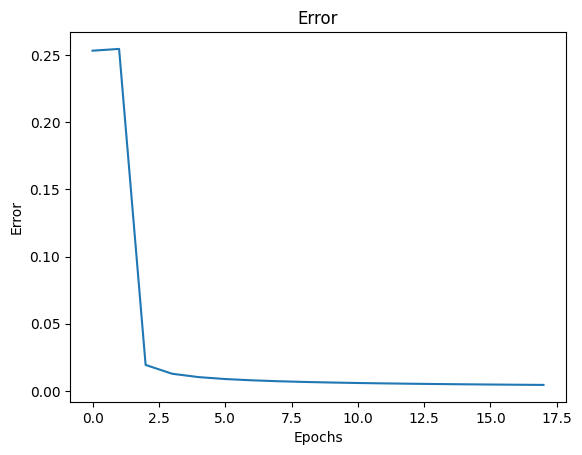

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Epoch: 9999, Average error: 0.26420
Epoch: 19999, Average error: 0.26627
Epoch: 29999, Average error: 0.10979
Epoch: 39999, Average error: 0.03072
Epoch: 49999, Average error: 0.02342
Epoch: 59999, Average error: 0.02023
Epoch: 69999, Average error: 0.01835
Epoch: 79999, Average error: 0.01707
Epoch: 89999, Average error: 0.01612
Epoch: 99999, Average error: 0.01539
Epoch: 109999, Average error: 0.01479
Epoch: 119999, Average error: 0.01429
Epoch: 129999, Average error: 0.01387
Epoch: 139999, Average error: 0.01350
Epoch: 149999, Average error: 0.01318
Epoch: 159999, Average error: 0.01289
Epoch: 169999, Average error: 0.01262
Epoch: 179999, Average error: 0.01238
Epoch: 189999, Average error: 0.01216
Epoch: 199999, Average error: 0.01196
Epoch: 209999, Average error: 0.01177
Epoch: 219999, Average error: 0.01160
Epoch: 229999, Average error: 0.01143
Epoch: 239999, Average error: 0.01128
Epoch: 249999, Average error: 0.01113
Epoch: 259999, Average error: 0.01099
Epoch: 269999, Average 

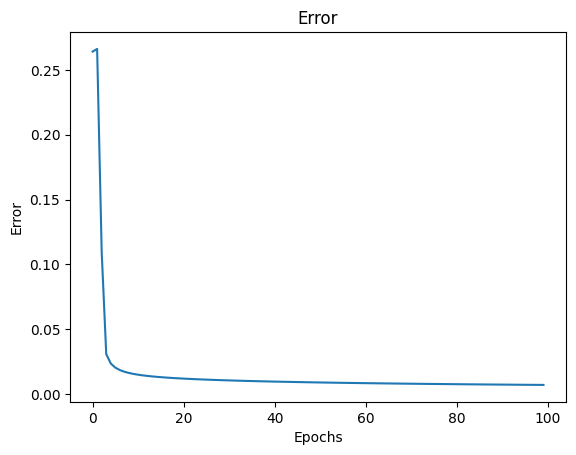

In [9]:
lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR


# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()